<center> *** LT Jonathan Shepherd *** </center>

**Overview:** In this lab assignment, you will execute a data analysis workflow to manipulate and analyze real data. The tasks associated with the lab will require you to primarily focus on using `pandas`, with additional plotting elements that you will accomplish via `matplotlib.pyplot`.  

<img src = "images/scipy_logo.png" height = "400" width = "400" align="center"/>  




**The Scenario:**  You are working on a research project dedicated to gaining insights into the historical effects (e.g. casualties, financial costs) of mass disasters.  Specifically, you have been given a data file containing documented **disaster data** that chronicles the occurence of mass disaster events from 1900 until 2006.  Potential results from your research could help identify historical mass disaster trends that might better inform deployment planning prepartions for humanitarian support operations.   

The data file is in comma separated value (CSV) format and has a header row indicating what is in each column.  The data was taken from the Emergency Events Database (EM-DAT) that is maintained by Centre for Research on the Epidemiology of Disasters [(CRED)](https://www.emdat.be/database). (*Data version: v06.01, created 6FEB06)*.

From the [(CRED)](https://www.emdat.be) website:

```"EMDAT contains essential core data on the occurrence and effects of over 12,800 mass disasters in the world from 1900 to present. The database is compiled from various sources, including UN agencies, non-governmental organisations, insurance companies, research institutes and press agencies."```  

Note: While the provided disaster data file includes information associated with over 15,000 disaster events, the current online database now documents over 22,000 events but requires a license to access in total.

The name of the file is ``disaster_info.csv`` and is available within the associated Lab 2 .zip file on the course Sakai site.

**Your Task:**  Write the necessary Python code to read, manipulate, analyze and visualize the disaster data in order to answer the explicit questions posed in this lab assignment worksheet.  A few important notes on this assignment:

 * This notebook contains all of the questions for this lab assignment 
 * You will answer ALL questions and write/execute ALL applicable code within THIS notebook.
 * This completed notebook (`lab2_worksheet_Last_First.ipynb`) is the only item you need to submit to Sakai **NLT 2300 12 FEB**

**Task 0: Become familiar with the data.** First, let's take a look at the `disaster_info.csv` data by viewing the data with our text editor of choice. We can observe this file in a manner similar to previous labs/practicums via a text editor to gain some initial insight.  

<p>The columns in this file correspond to:
<ul>
<li> <code>type</code> = the type of disaster	
<li> <code>event_name</code> = the name of the disaster (if it exists) 	
<li> <code>num_killed</code> = the number of fatalities
<li> <code>total_dam</code> = total damage (in adjusted USD)
<li> <code>start_year</code> = year in which the disaster began
<li> <code>start_month</code> = month in which the disaster began
<li> <code>start_day</code> = day of month on which the disaster began
<li> <code>iso</code> = three-letter country code
</ul></p>    

Observe that some fields might not be populated (i.e., a blank field is represented by successive commas).  

Let's also take a look at the data file through the available methods in `pandas` to gain a deeper understanding:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime 

In [5]:
disaster_df = pd.read_csv('disaster_info.csv')
(disaster_df.head(5)) 

,type,event_name,num_killed,total_dam,start_year,start_month,start_day,iso,event_id
0,Drought,,11000,0,1900,0,0,CPV,event_0
1,Drought,,1250000,0,1900,0,0,IND,event_1
2,Volcano,,30,0,1900,7,7,JPN,event_2
3,Epidemic,Gastroenteritis,30,0,1900,1,13,JAM,event_3
4,Wind Storm,,6000,1000000,1900,9,8,USA,event_4


In [6]:
disaster_df.isnull().sum()
disaster_df.duplicated().sum()
disaster_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15670 entries, 0 to 15669
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   type         15670 non-null  object
 1   event_name   15670 non-null  object
 2   num_killed   15670 non-null  int64 
 3   total_dam    15670 non-null  int64 
 4   start_year   15670 non-null  int64 
 5   start_month  15670 non-null  int64 
 6   start_day    15670 non-null  int64 
 7   iso          15670 non-null  object
 8   event_id     15670 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.1+ MB


In [7]:
disaster_df[disaster_df.start_year>1900]

,type,event_name,num_killed,total_dam,start_year,start_month,start_day,iso,event_id
7,Wave / Surge,,18,0,1901,8,10,JPN,event_7
8,Epidemic,,200000,0,1901,0,0,UGA,event_8
9,Industrial Accident,Coal mine,18,0,1901,4,27,BEL,event_9
10,Earthquake,,0,0,1901,5,19,TZA,event_10
11,Wave / Surge,,185,0,1902,1,2,SLV,event_11
...,...,...,...,...,...,...,...,...,...
15665,Extreme Temperature,,0,0,2006,1,18,UKR,event_15665
15666,Flood,,0,0,2006,7,14,SDN,event_15666
15667,Extreme Temperature,,0,0,2006,1,22,DEU,event_15667
15668,Extreme Temperature,,0,0,2006,1,0,RUS,event_15668


In [8]:
# disaster_df.shape # number of rows = 15670, columns = 9
# disaster_df.info()
# disaster_df.describe()
# disaster_df.values
# disaster_df['event_name'].unique() 
# disaster_df['event_name'].nunique() # coutns all of the unique values
disaster_df['iso'].value_counts() # coutns all of the unique values
disaster_df.replace(r'^\s*$',np.nan,regex=True,inplace=True) 

# Question 1:
## Using two different methods (see Part 1A and 1B), make a new DataFrame where the row index is given by the year and the column entries provide the following summary statistics for each year:
-  total damage for the year
-  total number of disasters occuring that year
-  average damage from all disasters for the year
-  maximum damage caused by any disaster for that year
-  the type of disaster that caused the maximum damage
-  total number of people killed by disasters that year

NOTE: The resulting DataFrames should have six total columns accounting for each summary statistic described above.

## Part 1A:
### Following the steps below, use boolean filtering to create a new DataFrame called `yearly_df1`:
-  **STEP 1:** Create a sorted list called `years` that contains the unique years present in the original DataFrame `disaster_df`.
-  **STEP 2:** Create `yearly_df1` initially as an empty DataFrame with ```index = years``` and ```columns = (total_damage, disaster_count, avg_damage_cost, max_damage_cost, max_damage_disaster, death_count)```
-  **STEP 3:** For each year:   
    a) Apply boolean selection to extract necessary information from the original DataFrame `disaster_df` for only the selected year.  
    b) From this subset DataFrame perspective for each year, determine the summary statistic required to satisfy the column entry descriptions.  
    c) Append the summary statistic results as a row to each applicable year index within the `yearly_df1` DataFrame created in **STEP 2**.




In [11]:
# disaster_df['start_year']
# disaster_df.loc[disaster_df.start_year == 1900,'total_dam']#.value_counts()

In [12]:
'''Lists of years'''
def years(disaster_df):
    years = []
    i = 0
    while i < len(disaster_df['start_year']):
#         years.append(disaster_df['start_year'][i])         

#         print (disaster_df['start_year'][i] )
        if disaster_df['start_year'][i] not in years:
            years.append(disaster_df['start_year'][i])
        i+=1
    return sorted(years) 
years_df = years(disaster_df)
# years_df # I dont understand why there are commas... I dont think the commas where 

In [13]:
yearly_df1 = pd.DataFrame(index=[years_df],
                   columns=['total_damage','disaster_count','avg_damage_cost', 'max_damage_cost','max_damage_disaster',
                           'death_count'])

empty_dict = {} # needed an empty to store my data
for current_year in years_df: # I needed to be able to loop through the years while still maintaining their pd formated data hence the "for" loop
#     print('where is the comma?',current_year)
# '''Since I did not want the code to go through all of the years, I made a subset of the years 
# so i wasn't redundantly counting through my data. 
# The boolean code was needed to pull the data for the right stats '''

    total_damage           = disaster_df.loc[disaster_df.start_year == current_year,'total_dam'].sum()
    disaster_count         = disaster_df.loc[disaster_df.start_year == current_year, 'type'].count()
    avg_damage_cost        = disaster_df.loc[disaster_df.start_year == current_year, 'total_dam'].mean()
    max_damage_cost        = disaster_df.loc[disaster_df.start_year == current_year, 'total_dam'].max()
    
    max_damage_disaster_01 =  disaster_df.loc[disaster_df.start_year == current_year,'total_dam'].idxmax() # returns max id for that year
    max_damage_disaster    = disaster_df.loc[max_damage_disaster_01 , 'type'] # I needed to compare the
#     print(current_year,max_damage_disaster_01,max_damage_disaster)
    
    death_count         = disaster_df.loc[disaster_df.start_year == current_year, 'num_killed'].sum()
#     print(current_year)
    
    #A dict was the easiest way to ensure the year went with the right stat.
    data = [total_damage,disaster_count,avg_damage_cost,max_damage_cost,max_damage_disaster,death_count]
    if current_year not in empty_dict:
        empty_dict[current_year] = data
#         print(current_year,data)
    
    
    
    '''The part below pieces all of the column stats together. Since I couldnt figure out a way to do it one by one
    i just made serveral lines of code.'''
    yearly_df1.loc[current_year,'total_damage']= empty_dict[current_year][0]
    yearly_df1.loc[current_year,'disaster_count']= empty_dict[current_year][1]    
    yearly_df1.loc[current_year,'avg_damage_cost']= empty_dict[current_year][2]    
    yearly_df1.loc[current_year, 'max_damage_cost']= empty_dict[current_year][3]    
    yearly_df1.loc[current_year,'max_damage_disaster']= empty_dict[current_year][4]    
    yearly_df1.loc[current_year,'death_count']= empty_dict[current_year][5]    


In [14]:
yearly_df1

,total_damage,disaster_count,avg_damage_cost,max_damage_cost,max_damage_disaster,death_count
1900,1000000,7,142857.142857,1000000,Wind Storm,1267660
1901,0,4,0.0,0,Wave / Surge,200036
1902,0,10,0.0,0,Wave / Surge,46152
1903,480000,9,53333.333333,480000,Flood,7175
1904,0,5,0.0,0,Transport Accident,1111
...,...,...,...,...,...,...
2002,41361888,868,47651.9447,11700000,Flood,61985
2003,49985415,741,67456.700405,5500000,Wind Storm,97368
2004,94493437,758,124661.526385,28000000,Earthquake,255089
2005,159292870,778,204746.619537,125000000,Wind Storm,102237


## Part 1B:
### Create the same new DataFrame as you did in **Part 1A**, but this time use `GroupBy` instead of boolean selection to create it. Name this new DataFrame `yearly_df2`:

In [15]:
yearly_df2 = pd.DataFrame(index=[years_df],
                   columns=['total_damage','disaster_count','avg_damage_cost', 'max_damage_cost','max_damage_disaster',
                           'death_count'])

empty_dict_df2 = {} # needed an empty to store my data
i = 0
for current_year in years_df:
    
    total_damage_df2 = disaster_df.groupby('start_year')['total_dam'].sum() #groupby returns a series data type. 
    total_damage_df2_td2 = total_damage_df2[current_year] # Using the list of yearsI can extract the one day point I want.

    
    disaster_count_df2           = disaster_df.groupby('start_year')['type'].count()  # This gives me all the data for disaster count
    disaster_count_df2_cd2       = disaster_count_df2[current_year] # due to indexing the current_year I am able to pull that one data point per year.
    
    
    avg_damage_cost_df2          = disaster_df.groupby('start_year')['total_dam'].mean()
    avg_damage_cost_df2_adc2     = avg_damage_cost_df2[current_year]
    
    max_damage_cost_df2          = disaster_df.groupby('start_year')['total_dam'].max()
    max_damange_cost_df2_mdc2    = max_damage_cost_df2[current_year]
    
    
    max_damage_disaster_df2      =  disaster_df.groupby('start_year')['total_dam'].idxmax() # This is a pandas.core.frame.DataFrame. So i need to group it again to get the type
#     max_damage_disaster_df2_v2   =  max_damage_disaster_df2[current_year]
    max_damage_disaster_df2_v3   =  disaster_df.loc[max_damage_disaster_df2,"type"]
    max_damage_disaster_df2_v3_f = max_damage_disaster_df2_v3.iloc[i]   
    i+=1
    
#     max_damage_disaster_df2      =  disaster_df.groupby('start_year')['total_dam','type'].max() # This is a pandas.core.frame.DataFrame. So i need to group it again to get the type
#     max_damage_disaster_type_df2 = max_damage_disaster_df2.groupby('start_year')['type'].max()
#     max_damage_disaster_df2_mdd2 =  max_damage_disaster_type_df2[current_year]
    
    death_count_df2              = disaster_df.groupby('start_year')['num_killed'].sum()
    death_count_df2_dc2          = death_count_df2[current_year]
    
    #A dict was the easiest way to ensure the year went with the right stat.
    data_df2 = [total_damage_df2_td2,
                disaster_count_df2_cd2,
                avg_damage_cost_df2_adc2,
                max_damange_cost_df2_mdc2,
                max_damage_disaster_df2_v3_f,
                death_count_df2_dc2]
    
    if current_year not in empty_dict_df2:
        empty_dict_df2[current_year] = data_df2
#     print(empty_dict_df2)
    
    
    
#     '''The part below pieces all of the column stats together. Since I couldnt figure out a way to do it one by one
#     i just made serveral lines of code.'''
    yearly_df2.loc[current_year,'total_damage']= empty_dict_df2[current_year][0]
    yearly_df2.loc[current_year,'disaster_count']= empty_dict_df2[current_year][1]    
    yearly_df2.loc[current_year,'avg_damage_cost']= empty_dict_df2[current_year][2]    
    yearly_df2.loc[current_year, 'max_damage_cost']= empty_dict_df2[current_year][3]    
    yearly_df2.loc[current_year,'max_damage_disaster']= empty_dict_df2[current_year][4]    
    yearly_df2.loc[current_year,'death_count']= empty_dict_df2[current_year][5]    


In [16]:
yearly_df2.tail()

,total_damage,disaster_count,avg_damage_cost,max_damage_cost,max_damage_disaster,death_count
2002,41361888,868,47651.9447,11700000,Flood,61985
2003,49985415,741,67456.700405,5500000,Wind Storm,97368
2004,94493437,758,124661.526385,28000000,Earthquake,255089
2005,159292870,778,204746.619537,125000000,Wind Storm,102237
2006,0,5,0.0,0,Extreme Temperature,0


In [17]:
# yearly_df1.head()
yearly_df1.tail()

,total_damage,disaster_count,avg_damage_cost,max_damage_cost,max_damage_disaster,death_count
2002,41361888,868,47651.9447,11700000,Flood,61985
2003,49985415,741,67456.700405,5500000,Wind Storm,97368
2004,94493437,758,124661.526385,28000000,Earthquake,255089
2005,159292870,778,204746.619537,125000000,Wind Storm,102237
2006,0,5,0.0,0,Extreme Temperature,0


# Question 2:
## Part 2A:
### Using either `yearly_df1` or `yearly_df2`, plot the total number of disasters per year as a line plot (over time). Explain any potential observed patterns.

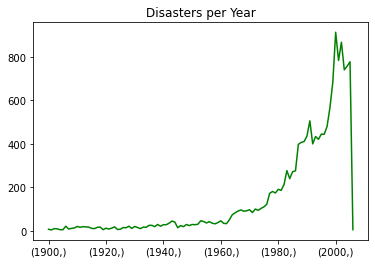

In [18]:
# Plot here
yearly_df1.disaster_count.plot(title='Disasters per Year', color='green')
plt.show()

### Explain observed patterns here --> '''As the years progress the number of disasters per year incleases over time. When we reach the late 1990s they start to decline'''

## Part 2B:
### Using either `yearly_df1` or `yearly_df2`, plot the total number of people killed per year as a line plot (over time). Explain any potential observed patterns.

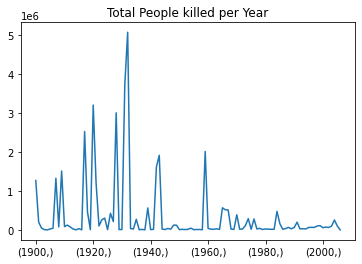

In [24]:
# Plot here
yearly_df1.death_count.plot(title="Total People killed per Year")
plt.show()

### Explain observed patterns here --> '''As the years progress the number of disasters per year incleases over time. When we reach the late 1990s they start to decline'''

## Part 2C:
### Using either `yearly_df1` or `yearly_df2`, plot the total (not average) damage per year as a line plot (over time). Explain any potential observed patterns.

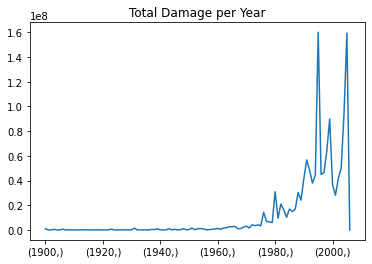

In [25]:
# Plot here
yearly_df1.total_damage.plot(title="Total Damage per Year")
plt.show()

### Explain observed patterns here --> '''The total damage per year can be potentially modeled with an exponential distribution up until the mid 90s, to which
 - The damage appears to be consistently minimal until the late 70s. 
 - In the 80s, the mass damage makes its first spite. 
 - The largest spikes appear to have occured in the late 90s early 2000s.

# Question 3:
## Part 3A:

The csv file `country_info.csv` (included in the lab .zip file) contains some useful info we want to use. It gives us the country name, region, and continent associated with each country's three character iso code. For each row in the original `disaster_info` DataFrame, attach the proper country name, region, and continent. NOTE: You are not allowed to do this with a `FOR` loop in this exercise.

In [26]:
# View the country_info.csv as a DataFrame
country_df = pd.read_csv('country_info.csv')
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   iso           221 non-null    object
 1   country_name  221 non-null    object
 2   region        221 non-null    object
 3   continent     221 non-null    object
dtypes: object(4)
memory usage: 7.0+ KB


Note:  A proper merge operation for this question will result in the modified `disaster_info` DataFrame having the same number of rows.

In [27]:
# Fuse the new country info with the existing disaster_info DataFrame
country_df.sort_values(by='iso')
# country_df.head()
merge_data_file = pd.merge(disaster_df,country_df, on='iso',how='left') 
merge_data_file
# merge_data_file.shape

,type,event_name,num_killed,total_dam,start_year,start_month,start_day,iso,event_id,country_name,region,continent
0,Drought,NaN,11000,0,1900,0,0,CPV,event_0,Cape Verde Is,West Africa,Africa
1,Drought,NaN,1250000,0,1900,0,0,IND,event_1,India,South Asia,Asia
2,Volcano,NaN,30,0,1900,7,7,JPN,event_2,Japan,East Asia,Asia
3,Epidemic,Gastroenteritis,30,0,1900,1,13,JAM,event_3,Jamaica,Caribbean,Americas
4,Wind Storm,NaN,6000,1000000,1900,9,8,USA,event_4,United States,North America,Americas
...,...,...,...,...,...,...,...,...,...,...,...,...
15665,Extreme Temperature,NaN,0,0,2006,1,18,UKR,event_15665,Ukraine,Russian Federation,Europe
15666,Flood,NaN,0,0,2006,7,14,SDN,event_15666,Sudan,North Africa,Africa
15667,Extreme Temperature,NaN,0,0,2006,1,22,DEU,event_15667,Germany,European Union,Europe
15668,Extreme Temperature,NaN,0,0,2006,1,0,RUS,event_15668,Russia,Russian Federation,Europe


In [28]:
# Verify you have the correct number of rows
print(disaster_df.shape, disaster_df.columns) # This tells me the number of rows and columns, and shows me the type of columns for disaster
print(country_df.shape, country_df.columns) # This tells me the number of rows and columns, and shows me the type of columns for country
print()
'''Verifying I have the right about of columns and rows in my data file.'''
print(merge_data_file.shape, merge_data_file.columns)

(15670, 9) Index(['type', 'event_name', 'num_killed', 'total_dam', 'start_year',
       'start_month', 'start_day', 'iso', 'event_id'],
      dtype='object')
(221, 4) Index(['iso', 'country_name', 'region', 'continent'], dtype='object')

(15670, 12) Index(['type', 'event_name', 'num_killed', 'total_dam', 'start_year',
       'start_month', 'start_day', 'iso', 'event_id', 'country_name', 'region',
       'continent'],
      dtype='object')


## Part 3B: 
### Explain (in words) how your answer to Q3A would change if `disaster_info` contains some iso codes not contained in `country_info`? 

#### Provide response here ---> My answer would not change 


# Question 4: 
### Use the pivot_table function to:

Create an entirely new DataFrame where the row index is `start_year`, the columns are disaster `type`, and the values are the total damage (`total_dam`) for the year in USD.


In [29]:
disaster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15670 entries, 0 to 15669
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   type         15670 non-null  object
 1   event_name   4717 non-null   object
 2   num_killed   15670 non-null  int64 
 3   total_dam    15670 non-null  int64 
 4   start_year   15670 non-null  int64 
 5   start_month  15670 non-null  int64 
 6   start_day    15670 non-null  int64 
 7   iso          15670 non-null  object
 8   event_id     15670 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.1+ MB


In [30]:
# years_df # Years 
# Columns_disasters = empty_type # Types of disasters 
# # data = # Total_dam
# Disasters_df2 = pd.DataFrame(index=[years_df],
#                    columns= Columns_disasters)

total_dam_pivot = disaster_df.pivot_table("total_dam",index="start_year",columns="type", aggfunc=sum, fill_value='0')
total_dam_pivot

type,Drought,Earthquake,Epidemic,Extreme Temperature,Famine,Flood,Industrial Accident,Insect Infestation,Misc Accident,Slides,Transport Accident,Volcano,Wave / Surge,Wild Fires,Wind Storm
start_year,,,,,,,,,,,,,,,
1900,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,1000000.0
1901,0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0.0,0,0
1902,0,0.0,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0.0
1903,0.0,0.0,0,0,0,480000.0,0,0,0.0,0.0,0,0,0,0,0.0
1904,0,0.0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,1661474.0,1567714.0,0.0,0.0,0.0,26121676.0,9960407.0,0,62000.0,12500.0,0.0,9000.0,0.0,51600.0,1915517.0
2003,710000.0,8752851.0,0.0,6050000.0,0,14649356.0,0.0,0,0.0,51961.0,0.0,0.0,0,2595000.0,17176247.0
2004,1561275.0,28613943.0,0.0,0.0,0,8068021.0,900000.0,0.0,0.0,0.0,408000.0,0.0,7710800.0,3000.0,47228398.0


# Question 5:  
### Create an entirely new dataframe with `index = start_year`, `columns = iso`, and with values equal to the total number of disasters (any disasters) that occured in each country (i.e. `iso`) for that year. If no disaster occured in a country for a given year, then either `0` or `NaN` is sufficient for the value.



In [32]:
iso_pivot_table = disaster_df.pivot_table('type',index="start_year",columns="iso",aggfunc= 'count',fill_value='0') # The fill changes the 'NaN' to 0
# I need the aggfunc due to the data type of 'type'
iso_pivot_table.T

start_year,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
iso,,,,,,,,,,,,,,,,,,,,,
AFG,0,0,0,0,0,0,0,0,0,0,...,6.0,8.0,5.0,7.0,8.0,21.0,10.0,6.0,19.0,0
AGO,0,0,0,0,0,0,0,0,0,0,...,0,3.0,3.0,14.0,12.0,3.0,4.0,8.0,1.0,0
AIA,0,0,0,0,0,0,0,0,0,0,...,0,0,1.0,0,0,0,0,0,0,0
ALB,0,0,0,0,0,0,0,0,0,0,...,1.0,1.0,0,0,0,3.0,0,3.0,2.0,0
ANT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZAF,0,0,0,0,0,0,0,0,0,0,...,4.0,8.0,18.0,16.0,13.0,16.0,11.0,7.0,8.0,0
ZAR,0,0,0,0,0,0,0,0,0,0,...,5.0,6.0,4.0,6.0,18.0,15.0,12.0,10.0,18.0,0


# Question 6:
### Devise one additional question about this dataset that has not been asked previously and provide the code to answer it below.

In [34]:
disaster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15670 entries, 0 to 15669
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   type         15670 non-null  object
 1   event_name   4717 non-null   object
 2   num_killed   15670 non-null  int64 
 3   total_dam    15670 non-null  int64 
 4   start_year   15670 non-null  int64 
 5   start_month  15670 non-null  int64 
 6   start_day    15670 non-null  int64 
 7   iso          15670 non-null  object
 8   event_id     15670 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.1+ MB


### POSE QUESTION HERE
# On average how many times (per year) did an event occur?

# Code to answer question here


In [35]:
disaster_df.pivot_table('total_dam',index="start_year",columns="type",aggfunc= 'mean',fill_value='0') # The fill changes the 'NaN' to 0

type,Drought,Earthquake,Epidemic,Extreme Temperature,Famine,Flood,Industrial Accident,Insect Infestation,Misc Accident,Slides,Transport Accident,Volcano,Wave / Surge,Wild Fires,Wind Storm
start_year,,,,,,,,,,,,,,,
1900,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,1000000.0
1901,0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0.0,0,0
1902,0,0.0,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0.0
1903,0.0,0.0,0,0,0,240000.0,0,0,0.0,0.0,0,0,0,0,0.0
1904,0,0.0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,46152.055556,44791.828571,0.0,0.0,0.0,151870.209302,207508.479167,0,1192.307692,657.894737,0.0,1285.714286,0.0,2345.454545,17102.830357
2003,35500.0,218821.275,0.0,336111.111111,0,92717.443038,0.0,0,0.0,2474.333333,0.0,0.0,0,185357.142857,226003.25
2004,104085.0,953798.1,0.0,0.0,0,63031.414062,10975.609756,0.0,0.0,0.0,1888.888889,0.0,593138.461538,375.0,390317.338843


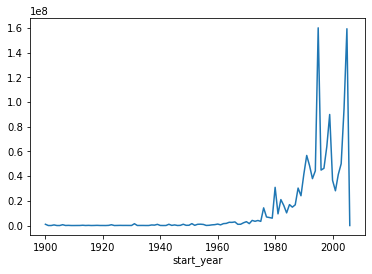

In [36]:
disaster_df.groupby('start_year')['total_dam'].sum().plot()
plt.show()